In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats

In [2]:
#Read into the S&P 500 csv file
df = pd.read_csv('SPX.csv', parse_dates = ['Date'])
print(df)

            Date         Open         High          Low        Close  \
0     1927-12-30    17.660000    17.660000    17.660000    17.660000   
1     1928-01-03    17.760000    17.760000    17.760000    17.760000   
2     1928-01-04    17.719999    17.719999    17.719999    17.719999   
3     1928-01-05    17.549999    17.549999    17.549999    17.549999   
4     1928-01-06    17.660000    17.660000    17.660000    17.660000   
...          ...          ...          ...          ...          ...   
23318 2020-10-29  3277.169922  3341.050049  3259.820068  3310.110107   
23319 2020-10-30  3293.590088  3304.929932  3233.939941  3269.959961   
23320 2020-11-02  3296.199951  3330.139893  3279.739990  3310.239990   
23321 2020-11-03  3336.250000  3389.489990  3336.250000  3369.159912   
23322 2020-11-04  3406.459961  3486.250000  3405.169922  3443.439941   

         Adj Close      Volume  
0        17.660000           0  
1        17.760000           0  
2        17.719999           0  
3  

In [3]:
#Trim the data down to only Date and Close columns and a timeframe of 5 years
df_trim = df.drop(columns=['Open','High','Low','Volume'])
start = (np.where(df['Date'] == dt.datetime(2015, 1, 2))[0])[0]
start
end = (np.where(df['Date'] == dt.datetime(2019, 12, 31))[0])[0]+1
df_trim = df_trim[start:end]
print(df_trim)

            Date        Close    Adj Close
21851 2015-01-02  2058.199951  2058.199951
21852 2015-01-05  2020.579956  2020.579956
21853 2015-01-06  2002.609985  2002.609985
21854 2015-01-07  2025.900024  2025.900024
21855 2015-01-08  2062.139893  2062.139893
...          ...          ...          ...
23104 2019-12-24  3223.379883  3223.379883
23105 2019-12-26  3239.909912  3239.909912
23106 2019-12-27  3240.020020  3240.020020
23107 2019-12-30  3221.290039  3221.290039
23108 2019-12-31  3230.780029  3230.780029

[1258 rows x 3 columns]


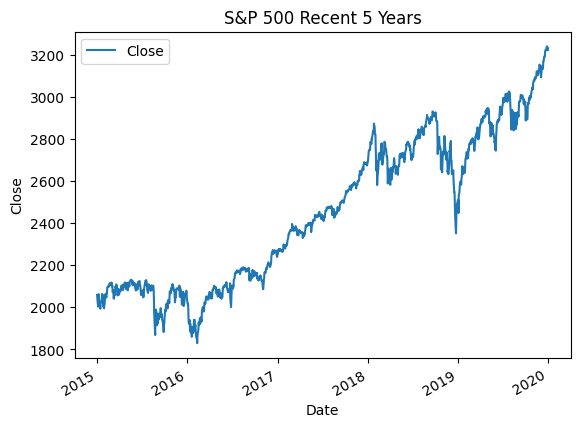

In [12]:
#Plot the trimmed data
df_trim.plot(title= 'S&P 500 Recent 5 Years', x='Date', y='Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.savefig('S&P 500 5Years.png')
plt.show()

In [5]:
#Create a new column for the Daily Percent Change throughout the 5 years
df_trim['Daily Percent Change'] = df['Close'].pct_change()
print(df_trim)

            Date        Close    Adj Close  Daily Percent Change
21851 2015-01-02  2058.199951  2058.199951             -0.000340
21852 2015-01-05  2020.579956  2020.579956             -0.018278
21853 2015-01-06  2002.609985  2002.609985             -0.008893
21854 2015-01-07  2025.900024  2025.900024              0.011630
21855 2015-01-08  2062.139893  2062.139893              0.017888
...          ...          ...          ...                   ...
23104 2019-12-24  3223.379883  3223.379883             -0.000195
23105 2019-12-26  3239.909912  3239.909912              0.005128
23106 2019-12-27  3240.020020  3240.020020              0.000034
23107 2019-12-30  3221.290039  3221.290039             -0.005781
23108 2019-12-31  3230.780029  3230.780029              0.002946

[1258 rows x 4 columns]


In [6]:
#Create new dataframes for each quarter of the year
df_trim_Q = df_trim
df_trim_Q['Quarter'] = df_trim['Date'].dt.quarter
df_trim_Q1s = df_trim_Q[df_trim_Q['Quarter'] == 1]
print(df_trim_Q1s)

df_trim_Q2s = df_trim_Q[df_trim_Q['Quarter'] == 2]
print(df_trim_Q2s)

df_trim_Q3s = df_trim_Q[df_trim_Q['Quarter'] == 3]
print(df_trim_Q3s)

df_trim_Q4s = df_trim_Q[df_trim_Q['Quarter'] == 4]
print(df_trim_Q4s)

            Date        Close    Adj Close  Daily Percent Change  Quarter
21851 2015-01-02  2058.199951  2058.199951             -0.000340        1
21852 2015-01-05  2020.579956  2020.579956             -0.018278        1
21853 2015-01-06  2002.609985  2002.609985             -0.008893        1
21854 2015-01-07  2025.900024  2025.900024              0.011630        1
21855 2015-01-08  2062.139893  2062.139893              0.017888        1
...          ...          ...          ...                   ...      ...
22913 2019-03-25  2798.360107  2798.360107             -0.000839        1
22914 2019-03-26  2818.459961  2818.459961              0.007183        1
22915 2019-03-27  2805.370117  2805.370117             -0.004644        1
22916 2019-03-28  2815.439941  2815.439941              0.003589        1
22917 2019-03-29  2834.399902  2834.399902              0.006734        1

[306 rows x 5 columns]
            Date        Close    Adj Close  Daily Percent Change  Quarter
21912 2015-04-

In [7]:
#Get the P-Value of the first quarters
tstatQ1, pvalueQ1 = stats.ttest_ind(df_trim_Q1s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ1)

0.6801896580276725


In [8]:
#P-Values for 2nd, 3rd, and 4th quarters
tstatQ2, pvalueQ2 = stats.ttest_ind(df_trim_Q2s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ2)

tstatQ3, pvalueQ3 = stats.ttest_ind(df_trim_Q3s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ3)

tstatQ4, pvalueQ4 = stats.ttest_ind(df_trim_Q4s['Daily Percent Change'], df_trim['Daily Percent Change'])
print(pvalueQ4)

0.9556604719142009
0.8413210154815303
0.873215784148441


In [9]:
#Create a new dataframe called df_QGroup with time period, average daily percent change and p-value difference from overall
df_QGroup = pd.DataFrame({"Time Period": ["Quarter 1", "Quarter 2", "Quarter 3", "Quarter 4", "Overall"],
                          "Average Daily Percent Change": [df_trim_Q1s['Daily Percent Change'].mean(),
                                                           df_trim_Q2s['Daily Percent Change'].mean(),
                                                           df_trim_Q3s['Daily Percent Change'].mean(),
                                                           df_trim_Q4s['Daily Percent Change'].mean(),
                                                           df_trim['Daily Percent Change'].mean()],
                          "p-value difference from overall": [pvalueQ1, pvalueQ2, pvalueQ3, pvalueQ4, None]},
                         index = ["1", "2", "3", "4", "5"])
print(df_QGroup)

  Time Period  Average Daily Percent Change  p-value difference from overall
1   Quarter 1                      0.000622                         0.680190
2   Quarter 2                      0.000365                         0.955660
3   Quarter 3                      0.000288                         0.841321
4   Quarter 4                      0.000308                         0.873216
5     Overall                      0.000394                              NaN


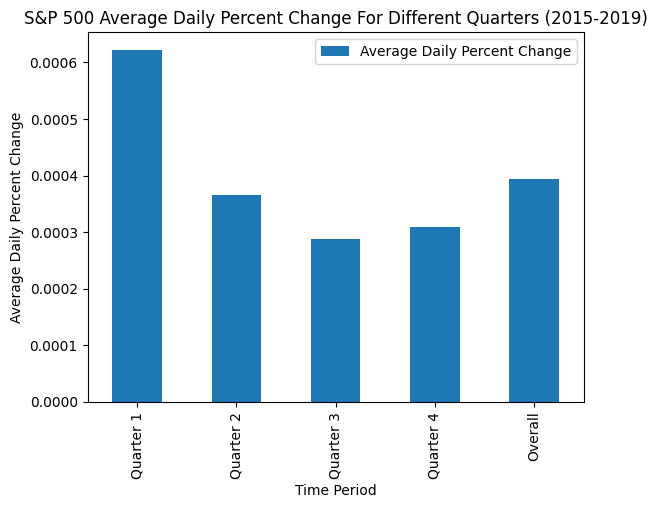

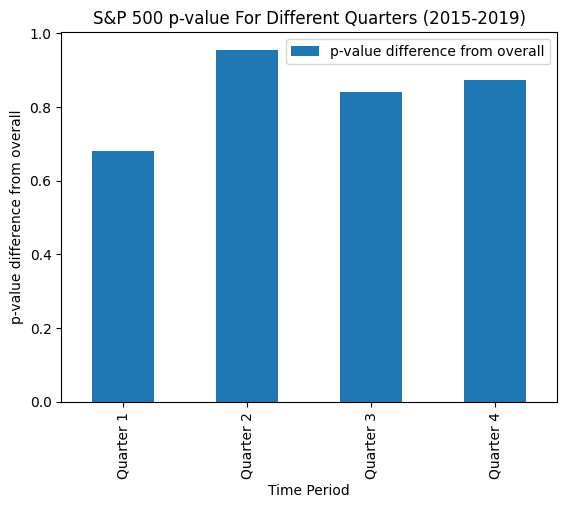

In [10]:
#Plot the average daily percent change and another graph for the P-Values
df_QGroup.plot(title= 'S&P 500 Average Daily Percent Change For Different Quarters (2015-2019)',x='Time Period', y='Average Daily Percent Change', kind='bar')
plt.xlabel('Time Period')
plt.ylabel('Average Daily Percent Change')
plt.savefig('S&P 500 AverageDailyPercentChangeForDifferentQuarters.png', bbox_inches = "tight")
plt.show()

df_QGroup[0:4].plot(title= 'S&P 500 p-value For Different Quarters (2015-2019)',x='Time Period', y='p-value difference from overall', kind='bar')
plt.xlabel('Time Period')
plt.ylabel('p-value difference from overall')
plt.savefig('S&P 500 P-ValueForDifferentQuarters.png', bbox_inches = "tight")
plt.show()

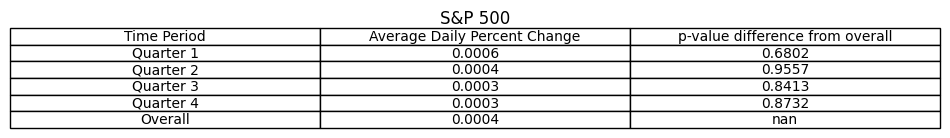

In [11]:
#Table of the new dataframe "df_QGroup"
plt.figure(figsize=(12,1.2))
plt.table(cellText=df_QGroup.round(4).values, colLabels=df_QGroup.columns, loc = 'center', cellLoc= 'center')
plt.title('S&P 500')
plt.axis('off')
plt.savefig('S&P 500 Table.png', bbox_inches = "tight")
plt.show()